In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from time import time
from sklearn.pipeline import Pipeline

file_path = './veri.csv'
data = pd.read_csv(file_path)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

data.head()


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


Naive Bayes Classifier Results:
Accuracy:0.7229437229437229
Confusion Matrix: [[126  25]
 [ 39  41]]
Classification Report: {'0': {'precision': 0.7636363636363637, 'recall': 0.8344370860927153, 'f1-score': 0.7974683544303798, 'support': 151}, '1': {'precision': 0.6212121212121212, 'recall': 0.5125, 'f1-score': 0.5616438356164383, 'support': 80}, 'accuracy': 0.7229437229437229, 'macro avg': {'precision': 0.6924242424242424, 'recall': 0.6734685430463576, 'f1-score': 0.679556095023409, 'support': 231}, 'weighted avg': {'precision': 0.7143119506755871, 'recall': 0.7229437229437229, 'f1-score': 0.7157975254039066, 'support': 231}}
ROC AUC Score: 0.6734685430463576
Mean Squared Error: 0.27705627705627706


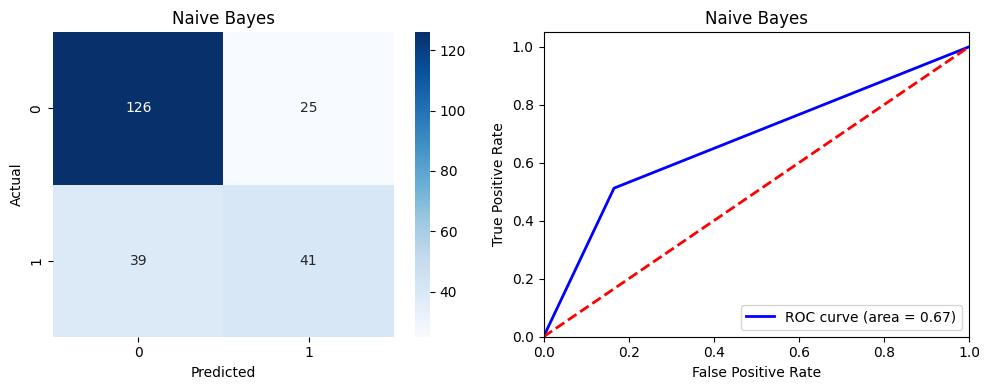

Optimized Naive Bayes Classifier Results:
Accuracy: 0.7229437229437229
Confusion Matrix: [[126  25]
 [ 39  41]]
Classification Report: {'0': {'precision': 0.7636363636363637, 'recall': 0.8344370860927153, 'f1-score': 0.7974683544303798, 'support': 151}, '1': {'precision': 0.6212121212121212, 'recall': 0.5125, 'f1-score': 0.5616438356164383, 'support': 80}, 'accuracy': 0.7229437229437229, 'macro avg': {'precision': 0.6924242424242424, 'recall': 0.6734685430463576, 'f1-score': 0.679556095023409, 'support': 231}, 'weighted avg': {'precision': 0.7143119506755871, 'recall': 0.7229437229437229, 'f1-score': 0.7157975254039066, 'support': 231}}
ROC AUC Score: 0.6734685430463576
Mean Squared Error: 0.27705627705627706


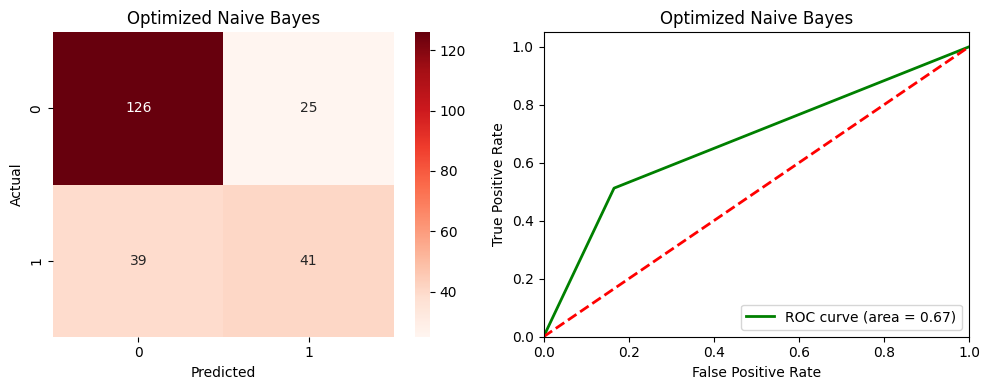

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
mse_nb = mean_squared_error(y_test, y_pred_nb)

print("Naive Bayes Classifier Results:")
print(f"Accuracy:{accuracy_nb}")
print(f"Confusion Matrix: {conf_matrix_nb}")
print(f"Classification Report: {class_report_nb}")
print(f"ROC AUC Score: {roc_auc_nb}")
print(f"Mean Squared Error: {mse_nb}")
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_scaled, y)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_selected, y, test_size=0.3, random_state=42)
nb_classifier_opt = GaussianNB()
nb_classifier_opt.fit(X_train_opt, y_train_opt)
y_pred_nb_opt = nb_classifier_opt.predict(X_test_opt)
accuracy_nb_opt = accuracy_score(y_test_opt, y_pred_nb_opt)
conf_matrix_nb_opt = confusion_matrix(y_test_opt, y_pred_nb_opt)
class_report_nb_opt = classification_report(y_test_opt, y_pred_nb_opt, output_dict=True)
roc_auc_nb_opt = roc_auc_score(y_test_opt, y_pred_nb_opt)
fpr_nb_opt, tpr_nb_opt, _ = roc_curve(y_test_opt, y_pred_nb_opt)
mse_nb_opt = mean_squared_error(y_test_opt, y_pred_nb_opt)

print("Optimized Naive Bayes Classifier Results:")
print(f"Accuracy: {accuracy_nb_opt}")
print(f"Confusion Matrix: {conf_matrix_nb_opt}")
print(f"Classification Report: {class_report_nb_opt}")
print(f"ROC AUC Score: {roc_auc_nb_opt}")
print(f"Mean Squared Error: {mse_nb_opt}")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_nb_opt, annot=True, fmt='d', cmap='Reds')
plt.title('Optimized Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
plt.plot(fpr_nb_opt, tpr_nb_opt, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb_opt)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimized Naive Bayes')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()



K-Neighbors
Best: 12
Accuracy: 0.7229437229437229
Confusion Matrix: [[132  19]
 [ 45  35]]
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.87      0.80       151
           1       0.65      0.44      0.52        80

    accuracy                           0.72       231
   macro avg       0.70      0.66      0.66       231
weighted avg       0.71      0.72      0.71       231

ROC AUC Score: 0.6558360927152318
Mean Square Error: 0.27705627705627706


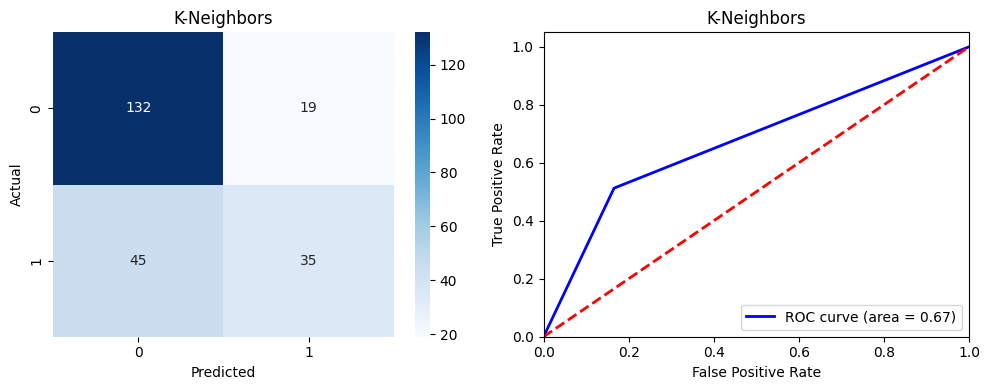

Optimized K-Neighbors Classifier Results:
Accuracy: 0.7056277056277056
Confusion Matrix: [[125  26]
 [ 42  38]]
Classification Report: {'0': {'precision': 0.7485029940119761, 'recall': 0.8278145695364238, 'f1-score': 0.7861635220125786, 'support': 151}, '1': {'precision': 0.59375, 'recall': 0.475, 'f1-score': 0.5277777777777778, 'support': 80}, 'accuracy': 0.7056277056277056, 'macro avg': {'precision': 0.671126497005988, 'recall': 0.651407284768212, 'f1-score': 0.6569706498951782, 'support': 231}, 'weighted avg': {'precision': 0.694908883531638, 'recall': 0.7056277056277056, 'f1-score': 0.696679281584942, 'support': 231}}
ROC AUC Score: 0.651407284768212
Mean Squared Error: 0.2943722943722944


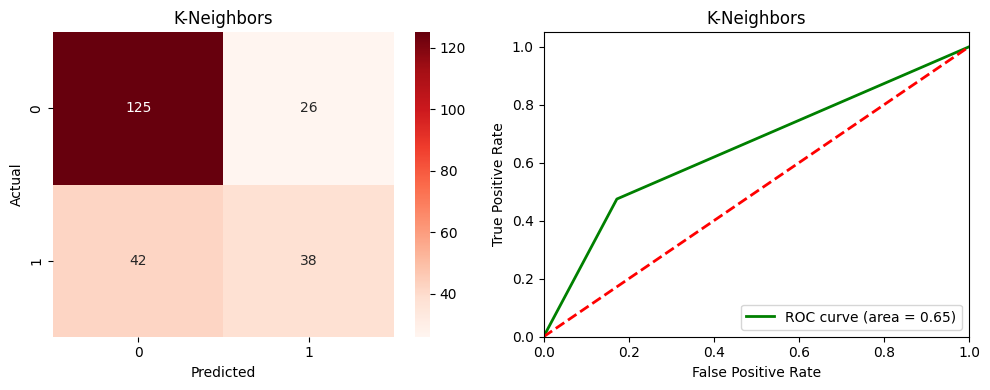

In [ ]:
param_grid = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
mse = mean_squared_error(y_test, y_pred)

print("K-Neighbors")
print(f"Best: {best_k}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {cm}")
print(f"Classification Report: {report}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Mean Square Error: {mse}")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('K-Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Neighbors')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_scaled, y)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_selected, y, test_size=0.3, random_state=42)
knn_opt = KNeighborsClassifier()
knn_opt.fit(X_train_opt, y_train_opt)
y_pred_nb_opt = knn_opt.predict(X_test_opt)
accuracy_nb_opt = accuracy_score(y_test_opt, y_pred_nb_opt)
conf_matrix_nb_opt = confusion_matrix(y_test_opt, y_pred_nb_opt)
class_report_nb_opt = classification_report(y_test_opt, y_pred_nb_opt, output_dict=True)
roc_auc_nb_opt = roc_auc_score(y_test_opt, y_pred_nb_opt)
fpr_nb_opt, tpr_nb_opt, _ = roc_curve(y_test_opt, y_pred_nb_opt)
mse_nb_opt = mean_squared_error(y_test_opt, y_pred_nb_opt)

print("Optimized K-Neighbors Classifier Results:")
print(f"Accuracy: {accuracy_nb_opt}")
print(f"Confusion Matrix: {conf_matrix_nb_opt}")
print(f"Classification Report: {class_report_nb_opt}")
print(f"ROC AUC Score: {roc_auc_nb_opt}")
print(f"Mean Squared Error: {mse_nb_opt}")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_nb_opt, annot=True, fmt='d', cmap='Reds')
plt.title('K-Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
plt.plot(fpr_nb_opt, tpr_nb_opt, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb_opt)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Neighbors')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()



Accuracy: 0.7142857142857143
Confusion Matrix: [[125  26]
 [ 40  40]]
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.83      0.79       151
           1       0.61      0.50      0.55        80

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.71      0.71      0.71       231

ROC AUC Score: 0.6639072847682119
Mean Square Error: 0.2857142857142857


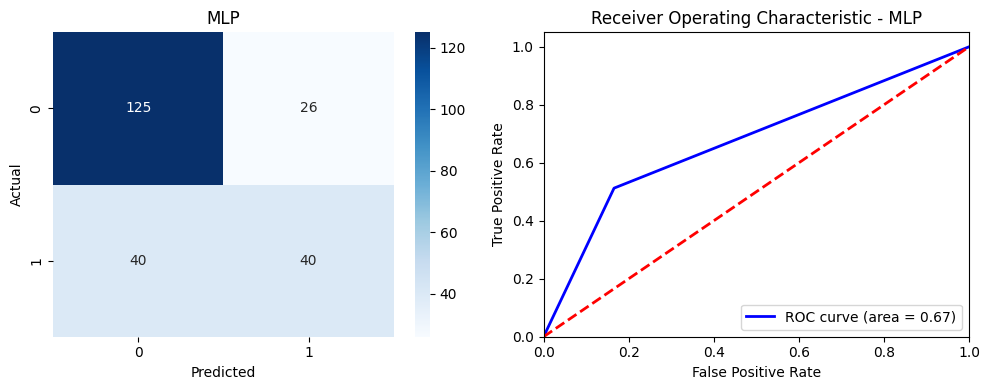

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier Results:
Accuracy: 0.7489177489177489
Confusion Matrix: [[125  26]
 [ 32  48]]
Classification Report: {'0': {'precision': 0.7961783439490446, 'recall': 0.8278145695364238, 'f1-score': 0.8116883116883117, 'support': 151}, '1': {'precision': 0.6486486486486487, 'recall': 0.6, 'f1-score': 0.6233766233766234, 'support': 80}, 'accuracy': 0.7489177489177489, 'macro avg': {'precision': 0.7224134962988467, 'recall': 0.713907284768212, 'f1-score': 0.7175324675324675, 'support': 231}, 'weighted avg': {'precision': 0.7450858087800764, 'recall': 0.7489177489177489, 'f1-score': 0.7464721425760387, 'support': 231}}
ROC AUC Score: 0.713907284768212
Mean Squared Error: 0.2510822510822511


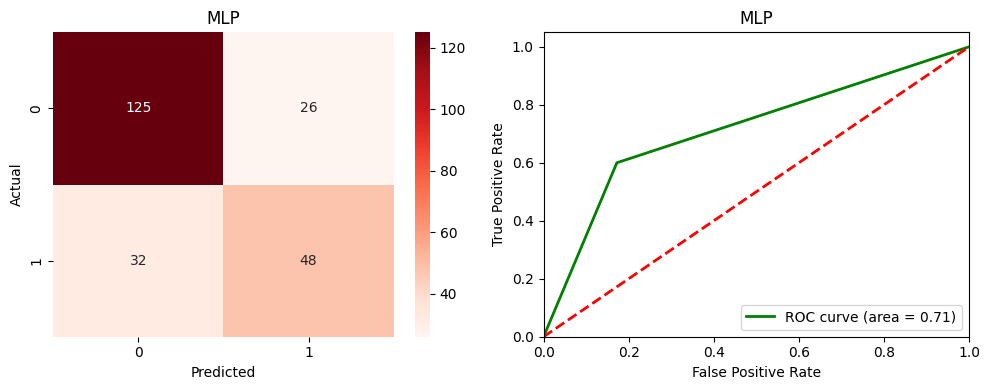

In [ ]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
mse = mean_squared_error(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {cm}")
print(f"Classification Report: {report}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Mean Square Error: {mse}")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - MLP')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_scaled, y)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_selected, y, test_size=0.3, random_state=42)
mlp_opt = MLPClassifier(random_state=42)
mlp_opt.fit(X_train_opt, y_train_opt)
y_pred_nb_opt = mlp_opt.predict(X_test_opt)
accuracy_nb_opt = accuracy_score(y_test_opt, y_pred_nb_opt)
conf_matrix_nb_opt = confusion_matrix(y_test_opt, y_pred_nb_opt)
class_report_nb_opt = classification_report(y_test_opt, y_pred_nb_opt, output_dict=True)
roc_auc_nb_opt = roc_auc_score(y_test_opt, y_pred_nb_opt)
fpr_nb_opt, tpr_nb_opt, _ = roc_curve(y_test_opt, y_pred_nb_opt)
mse_nb_opt = mean_squared_error(y_test_opt, y_pred_nb_opt)

print("MLP Classifier Results:")
print(f"Accuracy: {accuracy_nb_opt}")
print(f"Confusion Matrix: {conf_matrix_nb_opt}")
print(f"Classification Report: {class_report_nb_opt}")
print(f"ROC AUC Score: {roc_auc_nb_opt}")
print(f"Mean Squared Error: {mse_nb_opt}")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_nb_opt, annot=True, fmt='d', cmap='Reds')
plt.title('MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
plt.plot(fpr_nb_opt, tpr_nb_opt, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb_opt)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()



Accuracy: 0.7619047619047619
Confusion Matrix: [[136  15]
 [ 40  40]]
Classification Report:              precision    recall  f1-score   support

           0       0.77      0.90      0.83       151
           1       0.73      0.50      0.59        80

    accuracy                           0.76       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.76      0.76      0.75       231

ROC AUC Score: 0.7003311258278145
Mean Square Error: 0.23809523809523808


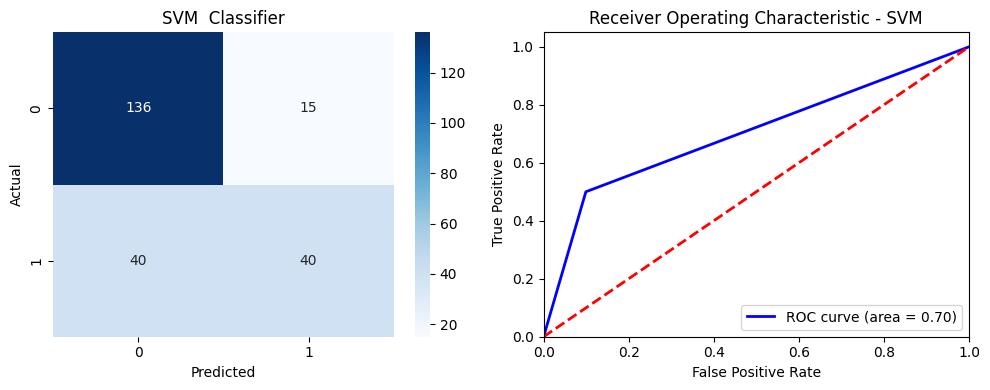

SVM Classifier Results:
Accuracy: 0.7445887445887446
Confusion Matrix: [[129  22]
 [ 37  43]]
Classification Report: {'0': {'precision': 0.7771084337349398, 'recall': 0.8543046357615894, 'f1-score': 0.8138801261829652, 'support': 151}, '1': {'precision': 0.6615384615384615, 'recall': 0.5375, 'f1-score': 0.593103448275862, 'support': 80}, 'accuracy': 0.7445887445887446, 'macro avg': {'precision': 0.7193234476367006, 'recall': 0.6959023178807947, 'f1-score': 0.7034917872294136, 'support': 231}, 'weighted avg': {'precision': 0.7370842009396226, 'recall': 0.7445887445887446, 'f1-score': 0.7374206706307216, 'support': 231}}
ROC AUC Score: 0.6959023178807948
Mean Squared Error: 0.2554112554112554


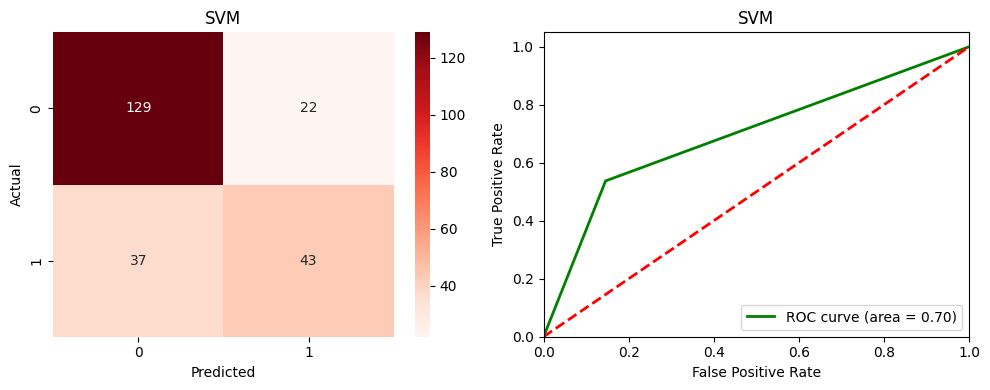

In [ ]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {cm}")
print(f"Classification Report:{report}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Mean Square Error: {mse}")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM  Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_scaled, y)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_selected, y, test_size=0.3, random_state=42)
svm_opt = SVC(random_state=42)
svm_opt.fit(X_train_opt, y_train_opt)
y_pred_nb_opt = svm_opt.predict(X_test_opt)
accuracy_nb_opt = accuracy_score(y_test_opt, y_pred_nb_opt)
conf_matrix_nb_opt = confusion_matrix(y_test_opt, y_pred_nb_opt)
class_report_nb_opt = classification_report(y_test_opt, y_pred_nb_opt, output_dict=True)
roc_auc_nb_opt = roc_auc_score(y_test_opt, y_pred_nb_opt)
fpr_nb_opt, tpr_nb_opt, _ = roc_curve(y_test_opt, y_pred_nb_opt)
mse_nb_opt = mean_squared_error(y_test_opt, y_pred_nb_opt)

print("SVM Classifier Results:")
print(f"Accuracy: {accuracy_nb_opt}")
print(f"Confusion Matrix: {conf_matrix_nb_opt}")
print(f"Classification Report: {class_report_nb_opt}")
print(f"ROC AUC Score: {roc_auc_nb_opt}")
print(f"Mean Squared Error: {mse_nb_opt}")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_nb_opt, annot=True, fmt='d', cmap='Reds')
plt.title('SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
plt.plot(fpr_nb_opt, tpr_nb_opt, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb_opt)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()




Validation result for Native Bayes Classification
accuracy : 72.29%
train and test time: 0.01s
--------------------------------------------------------------------------------
Validation result for K Nearest Neighbour Classification
accuracy : 72.29%
train and test time: 0.02s
--------------------------------------------------------------------------------
Validation result for MLP Classification
accuracy : 71.43%
train and test time: 0.35s
--------------------------------------------------------------------------------
Validation result for SVM Classification
accuracy : 76.19%
train and test time: 0.03s
--------------------------------------------------------------------------------


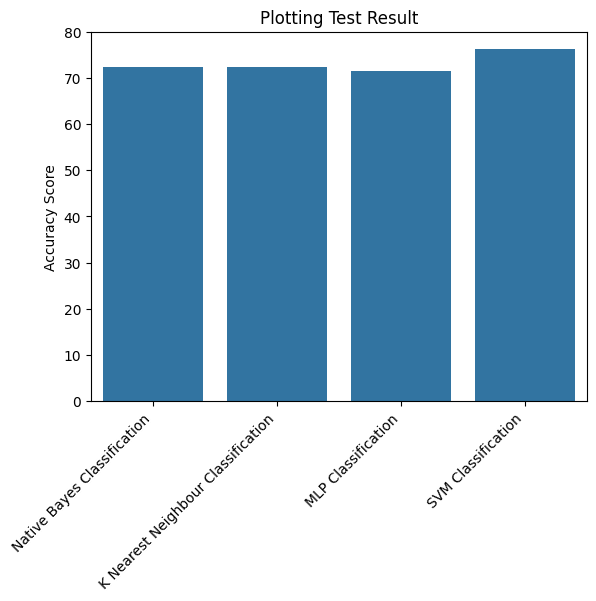

Validation result for Native Bayes Optimize Classification
accuracy : 72.29%
train and test time: 0.00s
--------------------------------------------------------------------------------
Validation result for K Nearest Neighbour Optimize Classification
accuracy : 70.56%
train and test time: 0.02s
--------------------------------------------------------------------------------
Validation result for MLP Optimize Classification


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy : 74.89%
train and test time: 0.68s
--------------------------------------------------------------------------------
Validation result for SVM Optimize Classification
accuracy : 74.46%
train and test time: 0.03s
--------------------------------------------------------------------------------


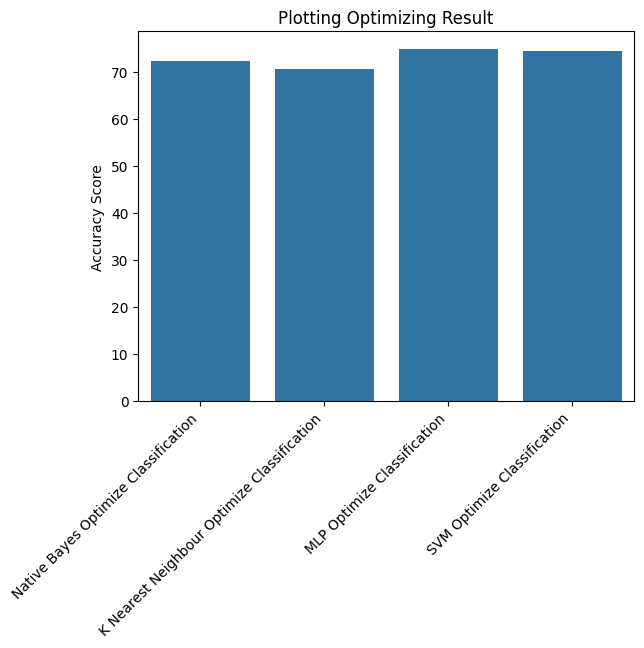

In [ ]:
names = [ 'Native Bayes Classification', 'K Nearest Neighbour Classification', 'MLP Classification', 'SVM Classification']
classifiers = [nb_classifier, knn, mlp, svm]
zipped_clf = zip(names,classifiers)

def acc_summary(model, train_X, train_y, val_X, val_y):
    t0 = time()
    model.fit(train_X, train_y)
    pred_y = model.predict(val_X)
    train_test_time = time() - t0
    accuracy = accuracy_score(val_y, pred_y)*100
    print("accuracy : {0:.2f}%".format(accuracy))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

def classifier_comparator(train_X,train_y,val_X,val_y,classifier):
    result = []
    for n,c in classifier:
      if n=='Neural Network': # for only neural network
        predictions = NN_model.predict(x_test)
        # round predictions
        rounded = [round(x[0]) for x in predictions]
        predictions = rounded
        score = accuracy_score(val_y, predictions)*100
        print("Test result for {}".format(n))
        print("train and test time: {0:.2f}s".format(train_test_time))
        print("accuracy : {0:.2f}%".format(score))
        print("-"*80)
        result.append((c,n,score,train_test_time))
      else:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        #print(c)
        clf_acc,tt_time = acc_summary(checker_pipeline,train_X, train_y, val_X, val_y)
        result.append((c,n,clf_acc,tt_time))
    return result

result = classifier_comparator(X_train, y_train, X_test, y_test, zipped_clf)
n = [v[1] for v in result]
s = [v[2] for v in result]

plt.figure()
sns.barplot(x = n, y = s)

plt.title("Plotting Test Result")

plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.ylabel('Accuracy Score')

plt.show()


names2 = [ 'Native Bayes Optimize Classification', 'K Nearest Neighbour Optimize Classification', 'MLP Optimize Classification', 'SVM Optimize Classification']
classifiers_opt = [nb_classifier_opt, knn_opt, mlp_opt, svm_opt]
zipped_clf_opt = zip(names2,classifiers_opt)

result = classifier_comparator(X_train_opt, y_train_opt, X_test_opt, y_test_opt, zipped_clf_opt)
n = [v[1] for v in result]
s = [v[2] for v in result]

plt.figure()
sns.barplot(x = n, y = s)

plt.title("Plotting Optimizing Result")

plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.ylabel('Accuracy Score')

plt.show()